# CUSTOMER CHURN PREDICTION:

# Importing necessary libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

# Load the dataset

In [64]:
df = pd.read_csv(r"C:\Users\manan\Downloads\Churn_Modelling.csv", header = 0)

# Initial data exploration

In [66]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [68]:
df.shape

(10000, 14)

In [69]:
df.size

140000

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
df.isnull().values.any()

False

In [72]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [73]:
df.index

RangeIndex(start=0, stop=10000, step=1)

# Check for unique values in categorical features

In [75]:
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["NumOfProducts"].unique())
print(df["HasCrCard"].unique())
print(df["IsActiveMember"].unique())
print(df["Exited"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [76]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Visualization 

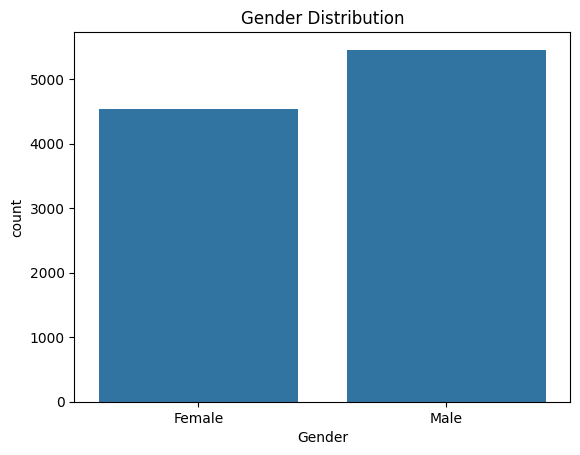

In [78]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

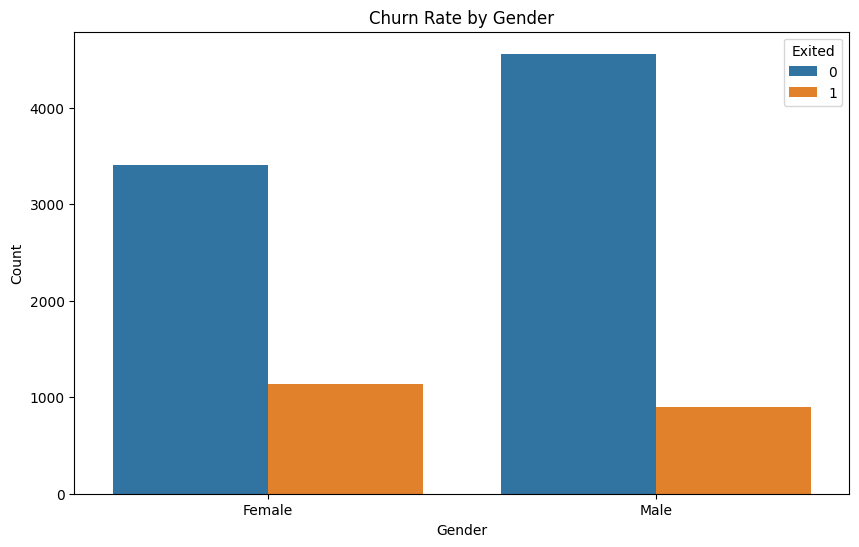

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

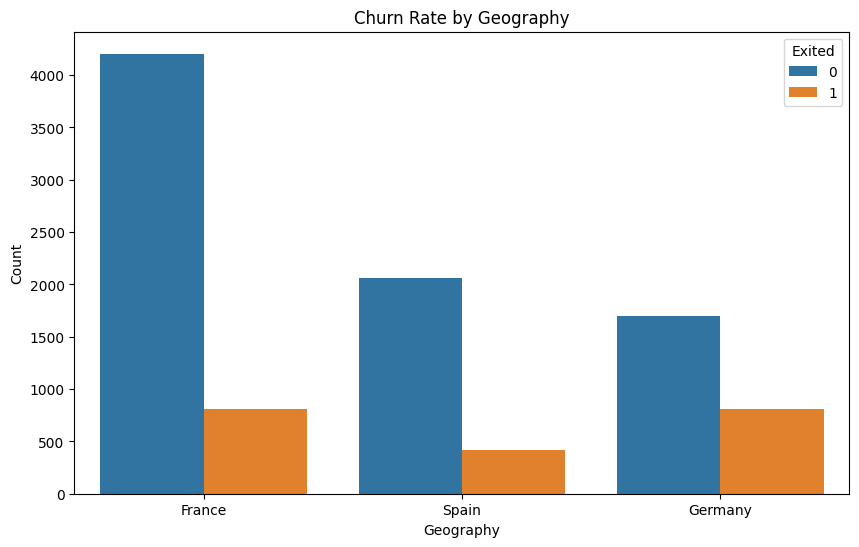

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

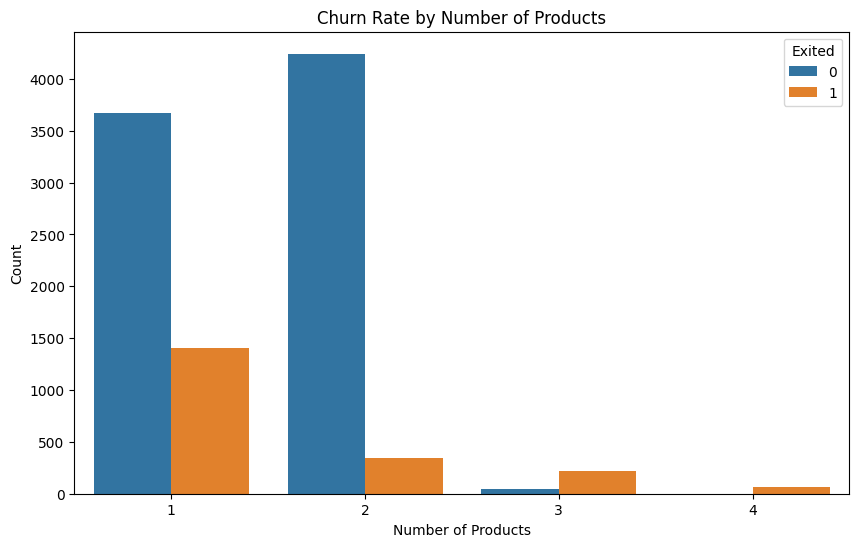

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

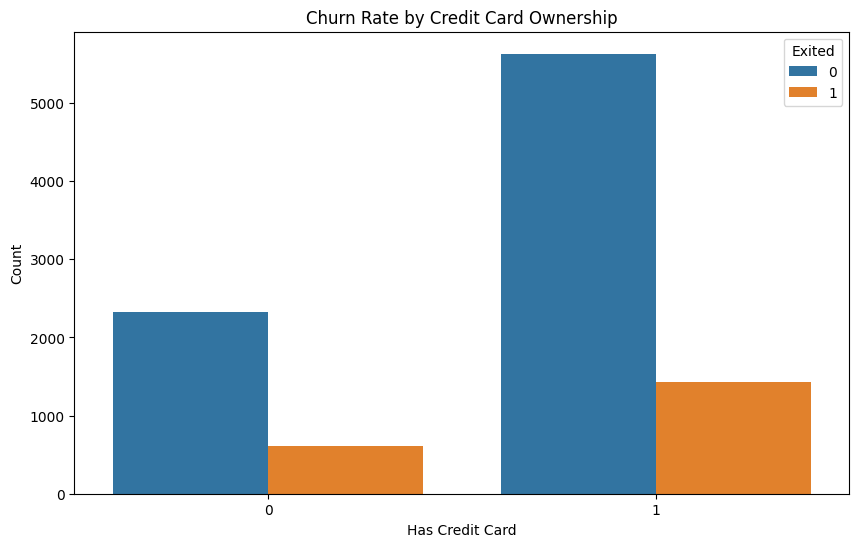

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn Rate by Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

# Dropping irrelevant features

In [84]:
df.drop(labels=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# One-hot encoding for categorical variables

In [86]:
df = pd.get_dummies(df, drop_first=True)

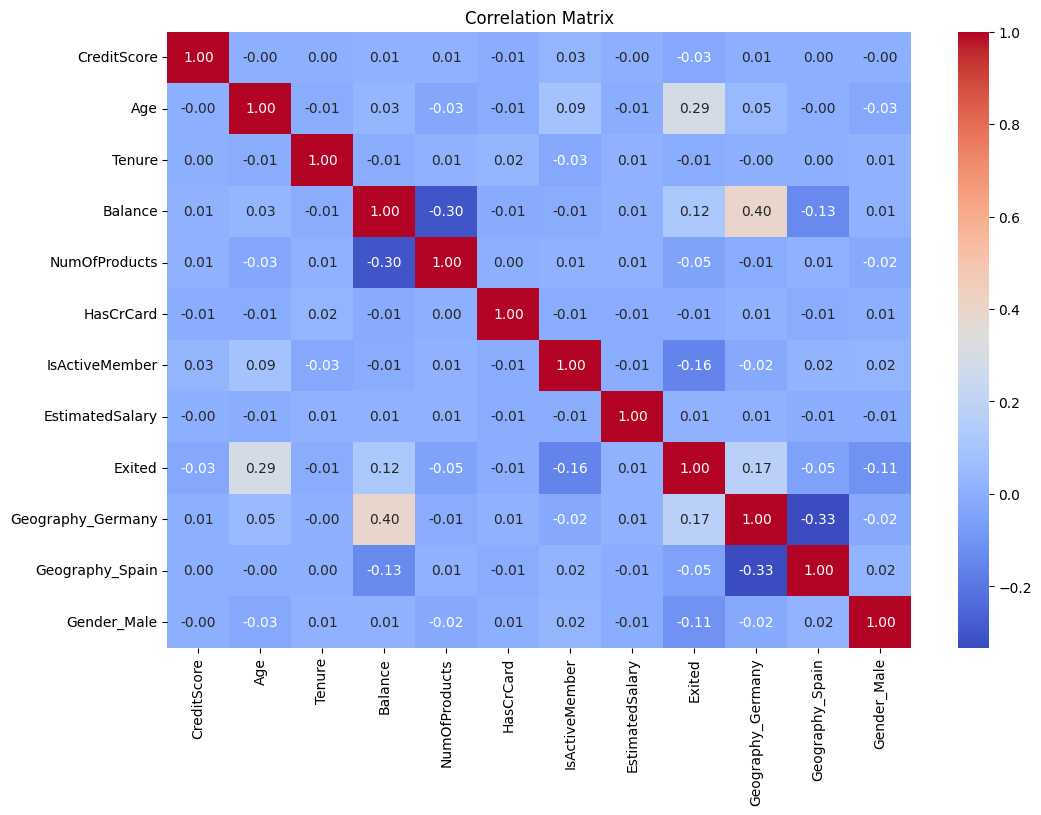

In [87]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Split the dataset into features and target variable

In [89]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Split the dataset into training and testing sets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

In [93]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model

In [95]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("Precision: ", precision_score(y_test, lr_predictions))
print("Recall: ", recall_score(y_test, lr_predictions))
print("F1 Score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy:  0.811
Precision:  0.5524475524475524
Recall:  0.2010178117048346
F1 Score:  0.2947761194029851


# Random Forest Model

In [97]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Model:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))
print("Precision: ", precision_score(y_test, rf_predictions))
print("Recall: ", recall_score(y_test, rf_predictions))
print("F1 Score: ", f1_score(y_test, rf_predictions))

Random Forest Model:
[[1547   60]
 [ 209  184]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy:  0.8655
Precision:  0.7540983606557377
Recall:  0.4681933842239186
F1 Score:  0.5777080062794349


# Gradient Boosting Model

In [99]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.02, max_depth=1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Model:")
print(confusion_matrix(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))
print("Accuracy: ", accuracy_score(y_test, gb_predictions))
print("Precision: ", precision_score(y_test, gb_predictions))
print("Recall: ", recall_score(y_test, gb_predictions))
print("F1 Score: ", f1_score(y_test, gb_predictions))

Gradient Boosting Model:
[[1550   57]
 [ 224  169]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.75      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy:  0.8595
Precision:  0.7477876106194691
Recall:  0.4300254452926209
F1 Score:  0.5460420032310178
